# DSCI 503 - Homework 05
### Mwamburi Bernard

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Problem 1: Working with 2D Arrays

In [2]:
np.random.seed(1)

Z = np.random.uniform(low=0, high=10, size=(5,8))
Z = np.round(Z, 2)
print(Z)

[[4.17 7.2  0.   3.02 1.47 0.92 1.86 3.46]
 [3.97 5.39 4.19 6.85 2.04 8.78 0.27 6.7 ]
 [4.17 5.59 1.4  1.98 8.01 9.68 3.13 6.92]
 [8.76 8.95 0.85 0.39 1.7  8.78 0.98 4.21]
 [9.58 5.33 6.92 3.16 6.87 8.35 0.18 7.5 ]]


In [3]:
print(f'''
Row 3:    {Z[2, :]}
Column 6: {Z[:, 5]}
''')


Row 3:    [4.17 5.59 1.4  1.98 8.01 9.68 3.13 6.92]
Column 6: [0.92 8.78 9.68 8.78 8.35]



In [4]:
row_sums = np.sum(Z, axis=1)
column_sums = np.sum(Z, axis=0)
array_sum = np.sum(Z)
print(f'''
Row Sums:    {row_sums}
Column Sums: {column_sums}
Array Sum:   {array_sum}
''')


Row Sums:    [22.1  38.19 40.88 34.62 47.89]
Column Sums: [30.65 32.46 13.36 15.4  20.09 36.51  6.42 28.79]
Array Sum:   183.68



## Problem 2: Reshaping ans Stacking Arrays

In [5]:
np.random.seed(167)

x1 = np.random.normal(loc=50, scale=10, size=1000)
x2 = np.random.normal(loc=20, scale=5, size=1000)
x3 = np.random.normal(loc=100, scale=30, size=1000)
x4 = np.random.normal(loc=10, scale=2, size=1000)

X1 = x1.reshape(-1,1)
X2 = x2.reshape(-1,1)
X3 = x3.reshape(-1,1)
X4 = x4.reshape(-1,1)
X = np.hstack([X1, X2, X3, X4])
print(X.shape)

(1000, 4)


In [6]:
print(X[:6, ])

[[ 37.07861534  16.70853691 138.06044614   8.89178909]
 [ 41.31985946  19.9126036   99.60511238   9.85945795]
 [ 63.14543816  14.42551389  70.08374932  11.59527292]
 [ 50.03237101  12.710325    95.04906965   8.47301568]
 [ 55.04813593  24.39747547  62.15786392   9.48500489]
 [ 59.23662027  25.68452252  64.57283065  12.84442801]]


## Problem 3: Standardization

In [7]:
col_average_X = np.mean(X, axis=0)
col_std_dev_X = np.std(X, axis=0)

print(f'''
Column means:               {np.round(col_average_X, 2)}
Column standard deviations: {np.round(col_std_dev_X, 2)}
''')


Column means:               [50.21 19.86 99.84 10.06]
Column standard deviations: [ 9.69  5.08 30.88  2.03]



In [8]:
W = (X - col_average_X) / col_std_dev_X
col_average_W = np.mean(W, axis=0)
col_std_dev_W = np.std(W, axis=0)
print(f'''
Column means:               {np.round(col_average_W, 2)}
Column standard deviations: {np.round(col_std_dev_W, 2)}
''')


Column means:               [-0.  0. -0. -0.]
Column standard deviations: [1. 1. 1. 1.]



## Problem 4: Load Auto MPG Dataset

In [9]:
auto = pd.read_table('auto_mpg.txt', sep='\t')
auto.head(10)

,mpg,cyl,wt,region,model
0,27.2,4,3190,eur,peugeot 504
1,32.8,4,1985,asia,mazda glc deluxe
2,18.1,6,3410,usa,amc concord d/l
3,17.5,8,4080,usa,dodge magnum xe
4,25.4,5,3530,eur,mercedes benz 300d
5,31.0,4,1773,asia,toyota corolla 1200
6,27.4,4,2670,usa,amc spirit dl
7,39.1,4,1755,asia,toyota starlet
8,34.3,4,2188,eur,audi 4000
9,30.0,4,2155,usa,buick opel isuzu deluxe


In [10]:
auto.shape

(398, 5)

In [11]:
auto.mean()

C:\Users\MRT\AppData\Local\Temp\ipykernel_21916\2601072796.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  auto.mean()


mpg      23.514573
cyl       5.454774
wt     2970.424623
dtype: float64

## Problem 5: Regional Counts and Means

In [12]:
regions = np.unique(auto.loc[:, "region"])
print(regions)

['asia' 'eur' 'usa']


In [13]:
asia_auto = auto.loc[auto.loc[:, 'region'] == 'asia', :]
eur_auto = auto.loc[auto.loc[:,'region'] == 'eur', :]
usa_auto = auto.loc[auto.loc[:, 'region'] == 'usa', :]

print(f'''
Number of cars manufactured in Asia:   {len(asia_auto)}
Number of cars manufactured in Europe: {len(eur_auto)}
Number of cars manufactured in USA:    {len(usa_auto)}
''')


Number of cars manufactured in Asia:   79
Number of cars manufactured in Europe: 70
Number of cars manufactured in USA:    249



In [14]:
asia_means = np.mean(asia_auto.loc[:, ['mpg', 'cyl', 'wt']])
eur_means = np.mean(eur_auto.loc[:, ['mpg', 'cyl', 'wt']])
usa_means = np.mean(usa_auto.loc[:, ['mpg', 'cyl', 'wt']])

mean_df = pd.DataFrame(data=[asia_means, eur_means, usa_means], columns=['mpg', 'cyl', 'wt'], index=regions)
mean_df

C:\Users\MRT\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\MRT\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\MRT\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


,mpg,cyl,wt
asia,30.450633,4.101266,2221.227848
eur,27.891429,4.157143,2423.300000
usa,20.083534,6.248996,3361.931727


## Problem 6: Average Weight and MPG by Region

In [15]:
colors1 = ['lime', 'slateblue', 'gold']

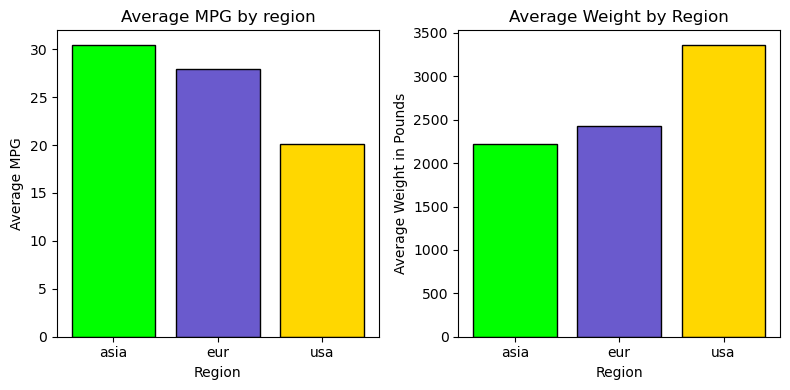

In [16]:
plt.figure(figsize=[8, 4])

plt.subplot(1, 2, 1)
plt.bar(regions, mean_df['mpg'], color=colors1, edgecolor='black')
plt.xlabel('Region')
plt.ylabel('Average MPG')
plt.title('Average MPG by region')

plt.subplot(1, 2, 2)
plt.bar(regions, mean_df['wt'], color=colors1, edgecolor='black')
plt.xlabel('Region')
plt.ylabel('Average Weight in Pounds')
plt.title('Average Weight by Region')

plt.tight_layout()
plt.show()

## Problem 7: Relationship between Weight and Miles Per Gallon

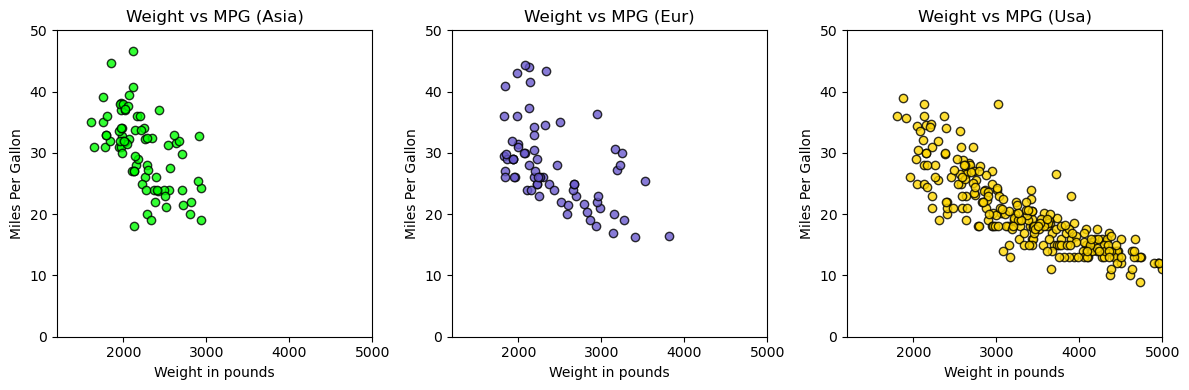

In [17]:
plt.figure(figsize=[12, 4])

for i, area in enumerate(regions):
    boolean_mask = auto.loc[:, 'region'] == area
    plt.subplot(1, 3, i + 1)
    plt.scatter(x = auto[boolean_mask]['wt'], y = auto[boolean_mask]['mpg'], edgecolor='black', color=colors1[i], alpha=0.8)
    plt.xlim(1200, 5000)
    plt.ylim(0, 50)
    plt.xlabel("Weight in pounds")
    plt.ylabel("Miles Per Gallon")
    plt.title(f"Weight vs MPG ({area.capitalize()})")
        
plt.tight_layout()
plt.show()

## Problem 8: Cylinder Distribution by Region

In [18]:
cyl_values = np.unique(auto.loc[:, 'cyl'])
print(cyl_values)

[3 4 5 6 8]


In [19]:
cyl_counts_by_region = pd.crosstab(auto.loc[:, 'cyl'], auto.loc[:, 'region'])
cyl_counts_by_region

region,asia,eur,usa
cyl,,,
3,4,0,0
4,69,63,72
5,0,3,0
6,6,4,74
8,0,0,103


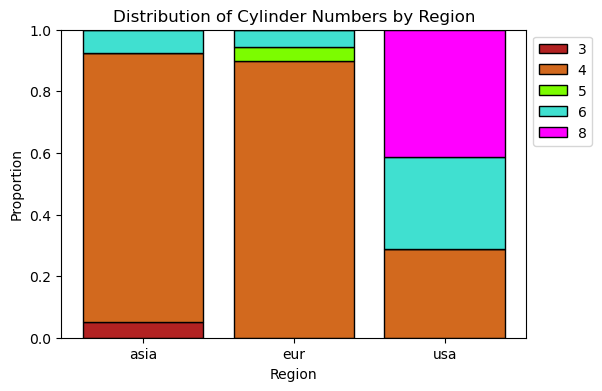

In [20]:
cyl_props_by_region = cyl_counts_by_region / np.sum(cyl_counts_by_region)
bar_bottoms = np.cumsum(cyl_props_by_region) - cyl_props_by_region
colors2 = ['firebrick', 'chocolate', 'lawngreen', 'turquoise', 'fuchsia']
plt.figure(figsize=[6, 4])
for i, row in enumerate(cyl_props_by_region.iterrows()):
    label, counts = row
    plt.bar(cyl_counts_by_region.columns, counts, label=str(label), color=colors2[i], edgecolor='k', bottom=bar_bottoms.iloc[i])
    
plt.xlabel('Region')
plt.ylabel('Proportion')
plt.title('Distribution of Cylinder Numbers by Region')
plt.legend(bbox_to_anchor=(1, 1))

plt.show()